In [1]:
working_directory = '/users/ironstein/documents/projects working directory/handwriting recognition using neural networks on FPGA final year project/image processing/ipython notebooks/python C extension testing/mark2'

import os
import time
import matplotlib.pyplot as plt
%matplotlib inline

os.chdir(working_directory)

In [2]:
%%file test.c

#include <stdio.h>

void for_loop_test(int n) {
    int i;
    for(i=0;i<n;i++);
}

Overwriting test.c


###generating shared object for the above C file (test.so)

In [3]:
os.system('cd ' + working_directory)
!clang -c test.c
!clang -o test.so -shared test.c
!file test.so

test.so: Mach-O 64-bit dynamically linked shared library x86_64


###python file to access the functions in test.so shared library

In [4]:
%%file _test.py

import numpy
import ctypes

_test_ = numpy.ctypeslib.load_library('test','.')
_test_.for_loop_test.argtypes = [ctypes.c_int]
_test_.for_loop_test.restype = ctypes.c_void_p

def C_for_test(n) : 
    _test_.for_loop_test(n)

Overwriting _test.py


In [5]:
def Python_for_test(n) : 
    for i in range(n) : 
        pass

###decorator for calculating time of execution of a function

In [6]:
def time_this_function(function) : 
    try : 
        time
    except : 
        import time
    
    def wrapper_function(*args,**kwargs) : 
        start_time = time.time()
        function(*args,**kwargs)
        elapsed_time = (time.time() - start_time)*1000
#         print(elapsed_time,end=' ms\n')
        return(elapsed_time)
        
    return wrapper_function

###testing Python and C functions for comparing the performance

In [7]:
import _test

@time_this_function
def C_test(n) : 
    _test.C_for_test(n)
    
@time_this_function
def Python_test(n) : 
    Python_for_test(n)
    

###time to compare the difference

In [8]:
C_time_array = []
Python_time_array = []
count_array = []
i = 1
while(True) : 
    C_time_array.append(C_test(i))
    Python_time_array.append(Python_test(i))
    count_array.append(i)
    i *= 10
    if(i > 1000000000) : 
        break

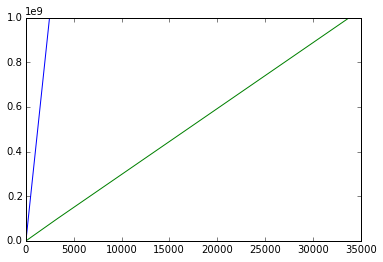

In [9]:
plt.plot(C_time_array,count_array,Python_time_array,count_array)
plt.show()

In [10]:
import graphlab

ImportError: No module named 'graphlab'